In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import beta, norm
from scipy.optimize import minimize

sns.set_theme('notebook', 'whitegrid', 'dark')

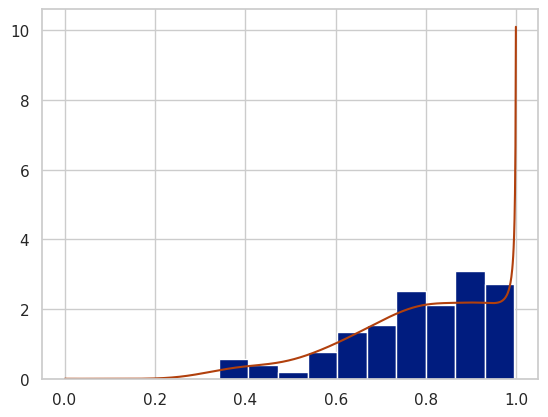

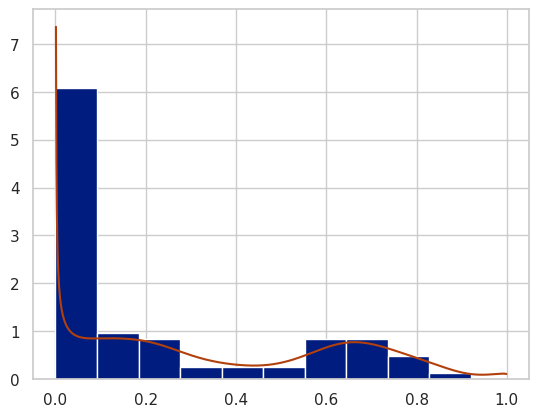

In [2]:
A = np.array([0.77428195, 0.95259664, 0.68554648, 0.66960782, 0.86657015, 0.92710385, 0.95080622, 0.87384748, 0.74505975, 0.88545409, 0.64541975, 0.73190332, 0.85157593, 0.95724145, 0.94876579, 0.84847279, 0.91025293, 0.73886176, 0.62514331, 0.95173726, 0.3416964, 0.45836852, 0.88340331, 0.65309473, 0.67406704, 0.5433274, 0.5614384, 0.81352359, 0.71120662, 0.75910615, 0.9936443, 0.89543611, 0.93307673, 0.96958939, 0.91108721, 0.74766852, 0.62124354, 0.92930237, 0.79917408, 0.8542891, 0.94281, 0.96049717, 0.89630407, 0.99557958, 0.40147087, 0.92643319, 0.72289058, 0.79590031, 0.87124513, 0.72256862, 0.42389215, 0.90292979, 0.95510388, 0.78493036, 0.81783269, 0.86370235, 0.86323431, 0.84791173, 0.87949414, 0.83937586, 0.38971314, 0.64825051, 0.60504323, 0.78475154, 0.75852202, 0.82919332, 0.96406849, 0.91438396, 0.90979851, 0.5391495, 0.77180069, 0.72742511, 0.57446365, 0.75692377, 0.64548481, 0.97647893, 0.74965431, 0.52986637, 0.84390872])

B = np.array([3.15479075e-03, 6.96428526e-01, 4.12219312e-01, 6.36490459e-01, 3.62233176e-04, 3.06008786e-02, 4.06519432e-01, 9.58527256e-05, 2.05743438e-03, 2.52704214e-01, 6.21817866e-01, 7.84407481e-07, 2.55599790e-02, 3.60943824e-01, 5.26910148e-05, 7.08011705e-02, 4.09425565e-02, 9.31626197e-02, 2.31017756e-01, 5.34014273e-03, 4.96165012e-06, 1.70112035e-01, 2.55361286e-03, 1.44423477e-01, 2.07784918e-01, 1.32664220e-05, 1.44198817e-02, 2.57438556e-06, 7.31855150e-01, 4.94361823e-02, 4.94036849e-03, 1.29871156e-01, 1.00000010e-07, 2.82774884e-03, 8.22665157e-02, 3.14009732e-03, 8.11582126e-01, 2.65785941e-02, 3.38954271e-04, 6.45066528e-03, 7.88416635e-01, 3.47357804e-04, 1.00000010e-07, 1.00000010e-07, 9.20401863e-01, 6.14676852e-02, 7.21201697e-01, 1.66339897e-01, 5.21527437e-01, 1.24952354e-04, 6.07132716e-01, 4.63086713e-02, 2.96982422e-01, 1.00000010e-07, 1.87893046e-02, 6.62068134e-01, 1.16958916e-01, 2.28630575e-03, 2.46759267e-01, 1.00000010e-07, 7.16883044e-01, 1.00000010e-07, 1.84771969e-01, 1.00000010e-07, 6.46784899e-01, 6.79933240e-01, 8.60622988e-02, 3.65438736e-02, 6.29349757e-01, 1.00000010e-07, 1.56395016e-01, 6.38947927e-01, 7.02176709e-03, 2.88394922e-03, 3.46374917e-03, 1.00000010e-07, 7.22696457e-03, 2.69470895e-03, 2.65976006e-01, 5.98871138e-01, 1.66366620e-04, 1.77207972e-05, 7.75980654e-01, 4.97039921e-02, 5.69007261e-01, 1.59072112e-04, 7.87636498e-01, 5.07299723e-01, 1.00000010e-07, 2.62597620e-01, 1.62306173e-01])

x = np.linspace(0, 1, 1000)
h = .07
mu = A
a = (mu*(mu*(1-mu)/h**2 - 1)).clip(1e-6)
b = (a*(1-mu)/mu).clip(1e-6)
kde = np.array([beta.pdf(x, a, b) for a, b in zip(a, b)]).sum(axis=0) / len(a)
plt.hist(mu, density=True)
plt.plot(x, kde)
plt.show()

mu = B
a = (mu*(mu*(1-mu)/h**2 - 1)).clip(1e-6)
b = (a*(1-mu)/mu).clip(1e-6)
kde = np.array([beta.pdf(x, a, b) for a, b in zip(a, b)]).sum(axis=0) / len(a)
plt.hist(mu, density=True)
plt.plot(x, kde);

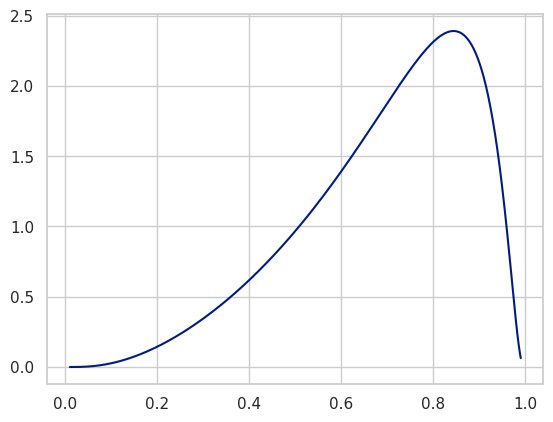

In [3]:
def normal(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def sigmoid_normal(x, mu, sigma):
    return normal(np.log(x)-np.log(1-x), mu, sigma) / (x*(1-x))

x = np.linspace(0.01, 0.99, 1000)
sigma = 1
mu = 1
plt.plot(x, sigmoid_normal(x, mu, sigma))

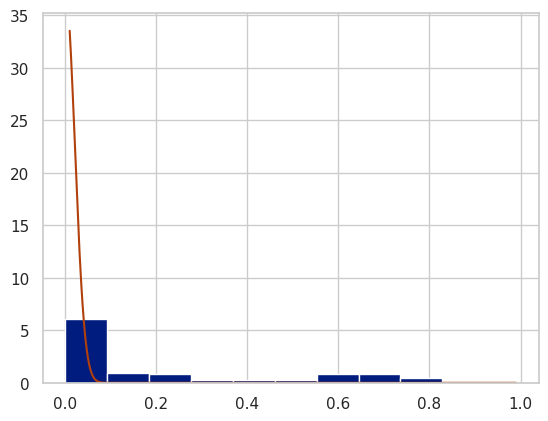

In [4]:
def half_normal(x, sigma):
    return 2 / (sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - 0) / sigma)**2)

def neg_log_likelihood(sigma):
    return -np.sum(half_normal(B, sigma))

constraints = [{'type': 'ineq', 'fun': lambda x: x}]

result = minimize(neg_log_likelihood, 1., method='SLSQP', constraints=constraints)
result.x

plt.hist(B, density=True)
plt.plot(x, half_normal(x, result.x[0]))